In [117]:
import numpy as np
import pandas as pd
# Set option manually
pd.set_option('display.max_columns', 70)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Reading Pre-Processed Data

Reading data obtained ussing the PreProcessed Notebook.

All the data types were kept by saving it into a pickle format.

In [18]:
afr = pd.read_pickle('Data/preprocessed.pkl')

# Statisticall Analysis:

## Correlation Analysis

Correlation Analysis can be of use when assessing the relevance of numeric features against the target column (is_exciting)

In [44]:
afr.select_dtypes(exclude='uint8')

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,year_posted
projectid,,,,,,,,
ffffc4f85b60efc5b52347df489d0238,0.0,0.0,0.0,9.0,703.34,857.73,90.0,2009
ffffac55ee02a49d1abc87ba6fc61135,57.0,0.0,7.0,35.0,207.43,244.04,8.0,2011
ffff97ed93720407d70a2787475932b0,100.0,0.0,3.0,35.0,440.01,517.66,25.0,2010
ffff418bb42fad24347527ad96100f81,100.0,0.0,1.0,17.0,798.85,974.21,20.0,2009
ffff2d9c769c8fb5335e949c615425eb,63.0,6.0,2.0,30.0,579.74,682.05,25.0,2013
...,...,...,...,...,...,...,...,...
0000ee613c92ddc5298bf63142996a5c,0.0,2.0,4.0,30.0,384.86,452.78,19.0,2013
0000b38bbc7252972f7984848cf58098,50.0,0.0,2.0,30.0,547.86,644.54,36.0,2013
00002d691c05c51a5fdfbb2baef0ba25,100.0,0.0,5.0,35.0,892.31,1049.78,250.0,2010


In [36]:
# Calculating correlations
corrs = []

for CORR in ['pearson', 'kendall', 'spearman']:
    # Calculating correlation and keeping it for 'is_exciting' column
    target_corr = (afr
                        .select_dtypes(exclude='uint8') # excluding binary columns
                        .assign(is_exciting = afr.is_exciting) # adding target column to the calculation
                        .corr(method=CORR) # Calculating correlation
                        .loc[:, ['is_exciting'] ] # Keeping Target column
                        .rename(columns={'is_exciting':CORR}) # Renaming column
                        .sort_values(by=[CORR], ascending=False) # Sorting
                        #.iloc[:20,:] # Keeping top 10
                    )

    # Appending into list
    corrs.append(target_corr)

# Compile all correlations
df = pd.concat(corrs, axis=1).drop(index='is_exciting')

Text(0.5, 1.0, "Correlation coeficients with 'is_exciting' column for numeric features")

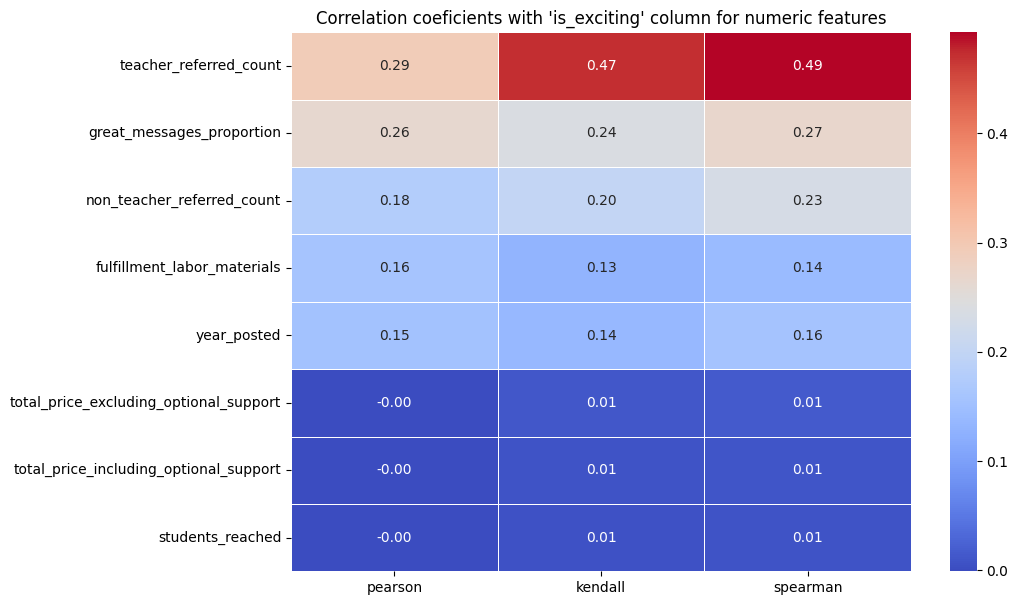

In [46]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.drop(index='is_exciting'),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            square=False,
            linewidths=0.5)
plt.title(f"Correlation coeficients with 'is_exciting' column for numeric features")

From the above matrix is noted that columns refering to the prices and students reach (bottom 3) aren't relevant for the task at hand.

The **teacher's referral** (top 1st) comes up with a positive intermediate correlation coefficients, specially non-linear (kendall, spearman) making it relevant when trying to determine interesting projects.

From the Exploration notebook is noted that these distributions contain extreme values:

array([[<Axes: title={'center': 'great_messages_proportion'}>,
        <Axes: title={'center': 'teacher_referred_count'}>,
        <Axes: title={'center': 'non_teacher_referred_count'}>],
       [<Axes: title={'center': 'fulfillment_labor_materials'}>,
        <Axes: title={'center': 'total_price_excluding_optional_support'}>,
        <Axes: title={'center': 'total_price_including_optional_support'}>],
       [<Axes: title={'center': 'students_reached'}>,
        <Axes: title={'center': 'year_posted'}>, <Axes: >]], dtype=object)

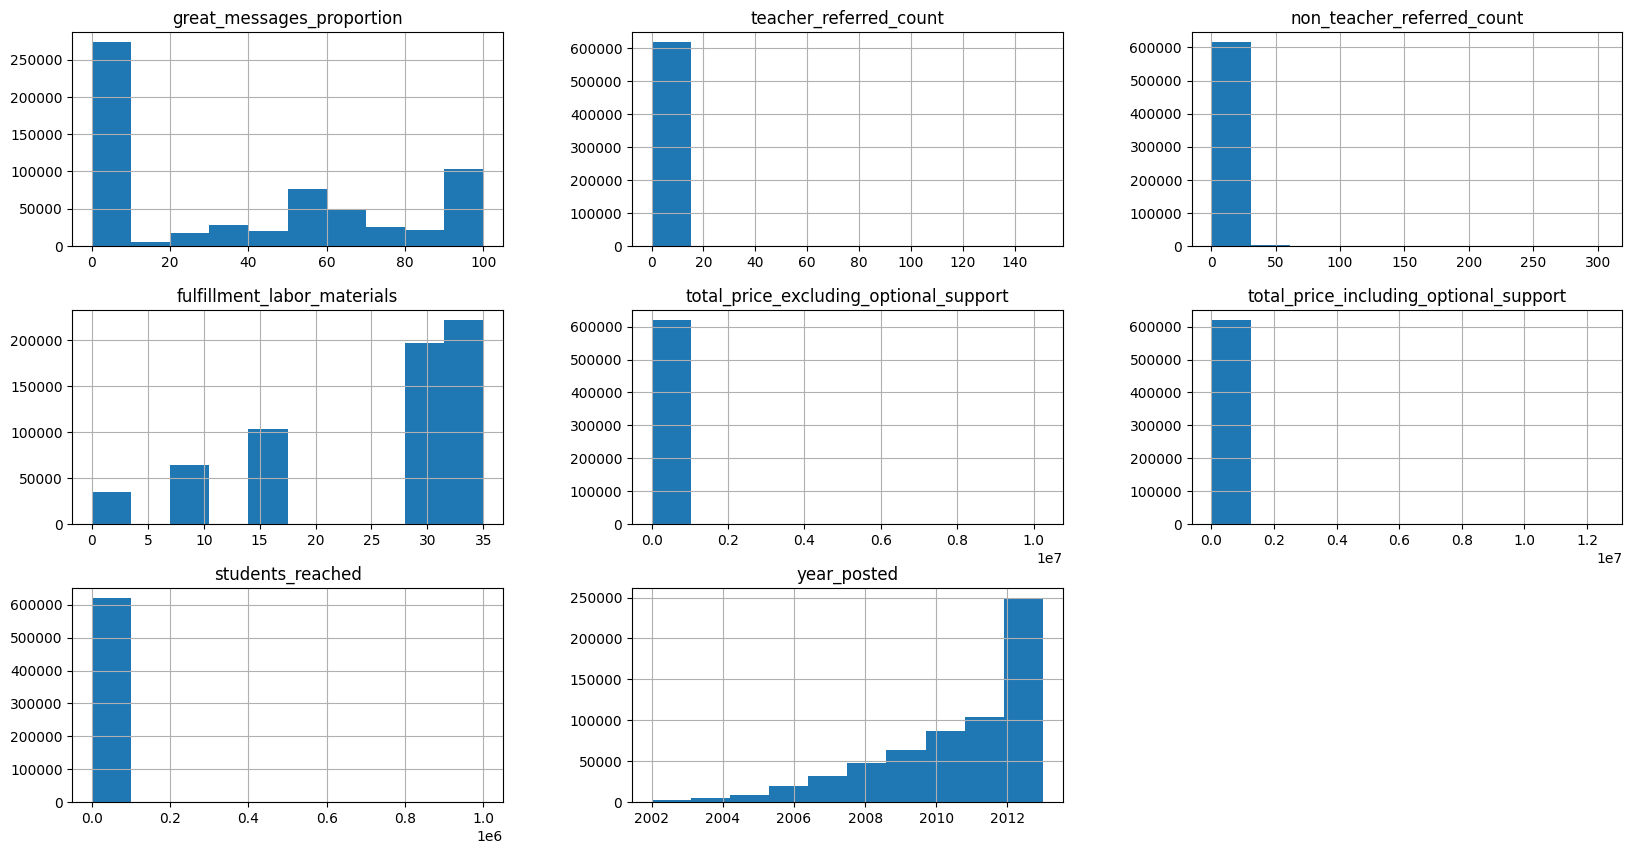

In [52]:
afr.select_dtypes(exclude='uint8').hist(figsize=(20,10))

Before stablishing conclussions on discarding them, let's take a look into the statistics of each with the target value:

In [78]:
(afr
    .select_dtypes(exclude='uint8') # excluding binary columns
    .assign(is_exciting = afr.is_exciting) # adding target column to the calculation
    .groupby(by='is_exciting')
    .describe()
    .stack(level=0)
    .swaplevel(0, 1)
    .sort_index(level=0)
    .reindex(['std', 'min', '25%', '50%', 'mean', '75%', 'max'], axis=1)
)

std      min  \
                                       is_exciting                          
fulfillment_labor_materials            0               10.925235     0.00   
                                       1                2.664202     9.00   
great_messages_proportion              0               38.166583     0.00   
                                       1               12.109529    62.00   
non_teacher_referred_count             0                5.177543     0.00   
                                       1                7.741322     0.00   
students_reached                       0             2436.877810     0.00   
                                       1              138.883981     0.00   
teacher_referred_count                 0                1.868137     0.00   
                                       1                3.275403     1.00   
total_price_excluding_optional_support 0            13532.249402     0.00   
                                       1              626.847128    89.12   
total_price_including_optional_support 0            16501.267206     0.00   
                                       1              737.537201   104.85   
year_posted                            0                2.222724  2002.00   
                                       1                1.087681  2010.00   

                                                          25%       50%  \
                                       is_exciting                        
fulfillment_labor_materials            0              17.0000    30.000   
                                       1              30.0000    35.000   
great_messages_proportion              0               0.0000    25.000   
                                       1              66.0000    75.000   
non_teacher_referred_count             0               1.0000     2.000   
                                       1               3.0000     6.000   
students_reached                       0              22.0000    30.000   
                                       1              23.0000    31.000   
teacher_referred_count                 0               0.0000     0.000   
                                       1               1.0000     2.000   
total_price_excluding_optional_support 0             264.7275   410.180   
                                       1             298.1525   417.395   
total_price_including_optional_support 0             315.3500   487.560   
                                       1             350.5425   491.050   
year_posted                            0            2009.0000  2011.000   
                                       1            2011.0000  2012.000   

                                                           mean        75%  \
                                       is_exciting                           
fulfillment_labor_materials            0              25.332370    35.0000   
                                       1              32.500899    35.0000   
great_messages_proportion              0              35.006807    66.0000   
                                       1              78.050722    85.0000   
non_teacher_referred_count             0               3.455264     4.0000   
                                       1               7.525770     9.0000   
students_reached                       0              97.989283   100.0000   
                                       1              88.333887   100.0000   
teacher_referred_count                 0               0.506953     0.0000   
                                       1               3.069681     4.0000   
total_price_excluding_optional_support 0             538.594048   581.0700   
                                       1             494.522591   569.7775   
total_price_including_optional_support 0             641.642968   691.1300   
                                       1             581.717963   670.2975   
year_posted                            0            2010.409563  2012.0000 

And also represent each of them graphically when sliced by "is_exciting":

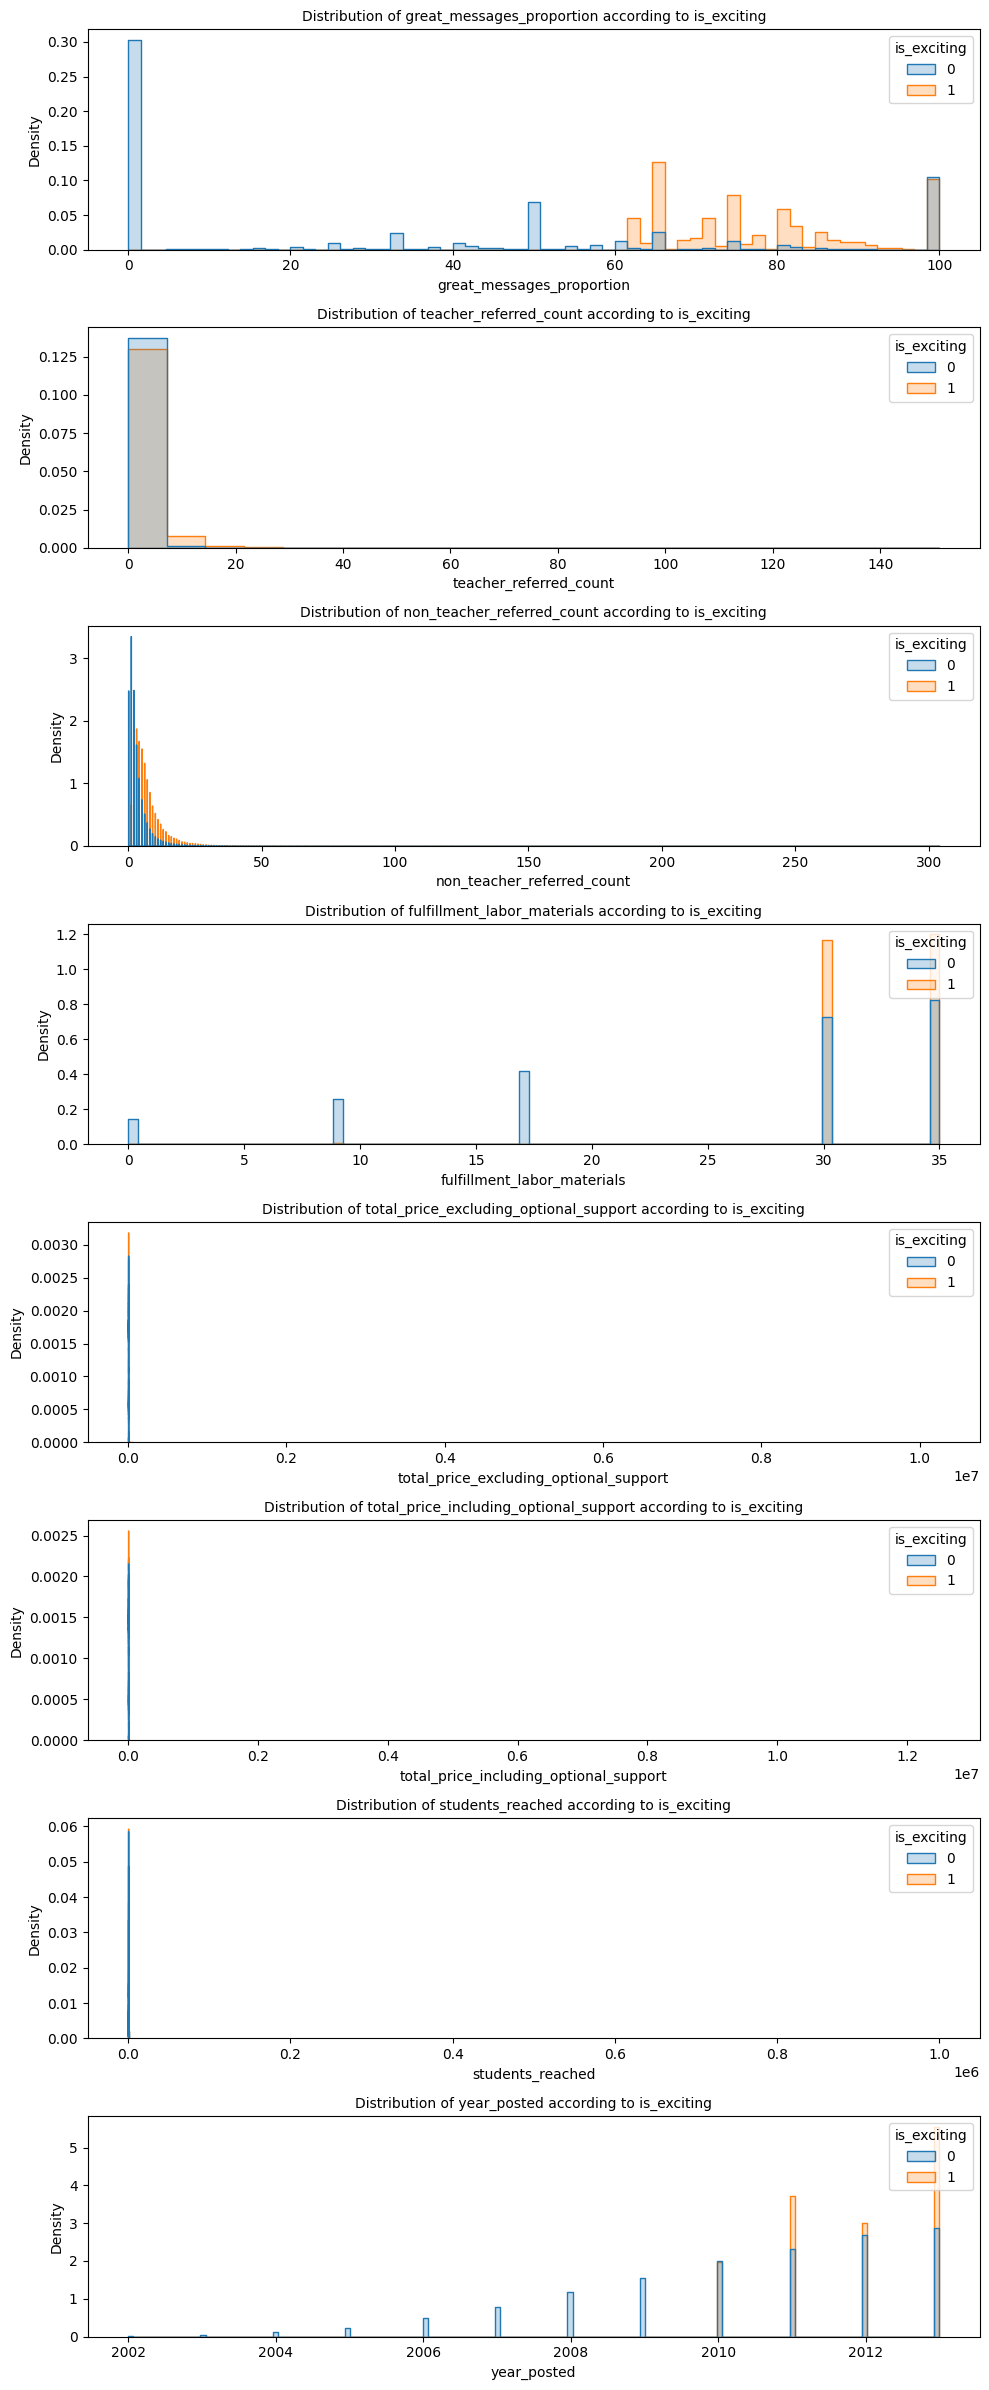

In [115]:
# Aggregating
fr = (afr
        .select_dtypes(exclude='uint8') # excluding binary columns
        .assign(is_exciting = afr.is_exciting)
        #.query("(total_price_excluding_optional_support <= 1200) and (students_reached <= 400)")
        )

binary_column = 'is_exciting'
cols = fr.columns
n_cols = len(cols) - 1 # exclude the binary column itself

fig, axes = plt.subplots(n_cols, 1, figsize=(10, 3 * n_cols))

for i, col in enumerate(cols):
    if col != binary_column:
        sns.histplot(data=fr, x=col, hue=binary_column, element='step', stat='density', common_norm=False, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} according to {binary_column}', fontsize=10)

plt.tight_layout()
plt.show()

Three columns showcase extreme values and graphically are difficult to assess (total columns and students_reached), by removing some of these outliers using the aggregated statistics above to inform on the best cut-off point and doing a correlation analysis:

In [114]:
(afr
        .select_dtypes(exclude='uint8')
        .assign(is_exciting = afr.is_exciting)
        .query("(total_price_excluding_optional_support <= 1200) and (students_reached <= 400)") # Filtered outliers
        .corr(method='kendall')
        .loc[:, ['is_exciting']]
        .drop(index=['is_exciting'])
        .style.background_gradient(cmap='coolwarm')
        )

,is_exciting
great_messages_proportion,0.239515
teacher_referred_count,0.476738
non_teacher_referred_count,0.199851
fulfillment_labor_materials,0.129722
total_price_excluding_optional_support,0.018849
total_price_including_optional_support,0.014463
students_reached,0.010286
year_posted,0.139323


Turns out that correlations stay within the same range as before.Most likely the total columns and students_reached are to be discarded.

## T-Test

Regarding the remaining columns, the aggregated statistics hint the possibility of group differences between groups (is_exciting = 0 | is_exciting = 1) let's be certain before discarding any by conducting a T-test as a final test for the numeric columns:

In [128]:
target_column = 'is_exciting'
cols = fr.columns.drop(target_column)

for col in cols:

    # Slicing groups
    gr_not_exciting = fr.query(f"{target_column} == 0")[col]
    gr_its_exciting = fr.query(f"{target_column} == 1")[col]

    t_statistic, p_value = ttest_ind(gr_not_exciting, gr_its_exciting)

    print('-'*5, '>', col, f'| P-value: {np.round(p_value, 4)}')
    #print(f'T-statistic: {t_statistic}')
    #print(f'P-value: {np.round(p_value, 4)}')


----- > great_messages_proportion | P-value: 0.0
----- > teacher_referred_count | P-value: 0.0
----- > non_teacher_referred_count | P-value: 0.0
----- > fulfillment_labor_materials | P-value: 0.0
----- > total_price_excluding_optional_support | P-value: 0.5327
----- > total_price_including_optional_support | P-value: 0.4866
----- > students_reached | P-value: 0.4478
----- > year_posted | P-value: 0.0


Considering a cut-off point for the p-value of 0.05, the results above can be divided in two groups:

- *p-value close to 0:* suggests that there is a statistically significant difference between the means of the two groups. The smaller the p-value, the stronger the evidence to reject the null hypothesis in favor of the alternative hypothesis (which states that there is a significant difference between the groups). Therefore, the columns above with a p-value close to 0 are considered to be statistically significant in predicting the target variable.

- *p-value close to 0.5:* A p-value around 0.5 suggests that there is no statistically significant difference between the means of the two groups under comparison. This high p-value indicates that you fail to reject the null hypothesis, implying that these columns may not be very useful in predicting the target variable, as they do not show a significant association with the target variable.

By the correlations and T-tests, *both total prices and students_reached* columns are not showing relevance when compared with the "is_exciting" column.

# Binary Columns Relevance